Using TensorFlow backend.


11501568/11490434 [==============================] - 0s 0us/step


W1209 22:12:17.468449 140249310934912 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1209 22:12:17.476031 140249310934912 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1209 22:12:17.483504 140249310934912 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1209 22:12:17.514539 140249310934912 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1209 22:12:17.579834 140249310934912 module_wrapper.py:139] From /usr/loca

('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


W1209 22:12:17.699517 140249310934912 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1209 22:12:17.817534 140249310934912 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1209 22:12:17.824878 140249310934912 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W1209 22:12:17.980479 140249310934912 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Se

Train on 60000 samples, validate on 10000 samples
Epoch 1/12


W1209 22:12:18.241009 140249310934912 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W1209 22:12:18.244605 140249310934912 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:199: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.

W1209 22:12:18.425062 140249310934912 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



60000/60000 [==============================] - 33s 544us/step - loss: 0.6539 - acc: 0.8155 - val_loss: 0.2039 - val_acc: 0.9377
Epoch 2/12
60000/60000 [==============================] - 32s 525us/step - loss: 0.1738 - acc: 0.9488 - val_loss: 0.1334 - val_acc: 0.9601
Epoch 3/12
60000/60000 [==============================] - 31s 525us/step - loss: 0.1221 - acc: 0.9627 - val_loss: 0.1024 - val_acc: 0.9698
Epoch 4/12
60000/60000 [==============================] - 31s 525us/step - loss: 0.0981 - acc: 0.9702 - val_loss: 0.0820 - val_acc: 0.9744
Epoch 5/12
60000/60000 [==============================] - 32s 526us/step - loss: 0.0836 - acc: 0.9749 - val_loss: 0.0673 - val_acc: 0.9795
Epoch 6/12
60000/60000 [==============================] - 31s 524us/step - loss: 0.0730 - acc: 0.9785 - val_loss: 0.0759 - val_acc: 0.9762
Epoch 7/12
60000/60000 [==============================] - 32s 525us/step - loss: 0.0660 - acc: 0.9800 - val_loss: 0.0591 - val_acc: 0.9809
Epoch 8/12
60000/60000 [==============

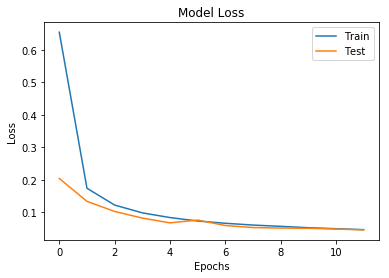

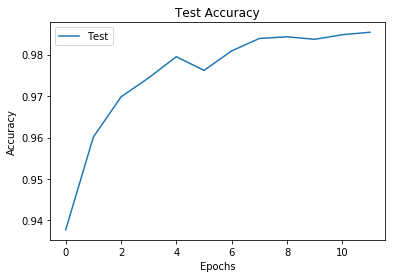

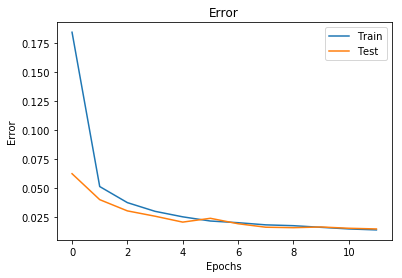

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5), #kernel size changed to 5*5 and feature map changed to 16
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu')) #kernel size changed to 5*5 and feature map changed to 32
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/ 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.1, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])

info= model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

TrainingLoss = info.history['loss']
TestLoss = info.history['val_loss']
#Training and Test Loss Vs Epochs
plt.plot(TrainingLoss)
plt.plot(TestLoss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

TestAccuracy = info.history['val_acc']
#Test Accuracy Vs Epochs
plt.plot(TestAccuracy)
plt.title('Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Test'], loc='best')
plt.show()

TrainingError= info.history['acc']
TestError=info.history['val_acc']
TestError = [1-i for i in TestError]
TrainingError = [1-i for i in TrainingError]
#Training and Test Error Vs Epochs
plt.plot(TrainingError)
plt.plot(TestError)
plt.title('Error')
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='best')
plt.show()